# Introduction - Business Problem

After finishing our Computer Science studies at Berkeley, we had a great idea and developed a prototype of a pair of augmented reality glasses with full 5G connectivity, bluetooth and a GPS chipset.
We avoided to include any camera on it (as Google Glasses) and focusing on social media streaming (as the first version of Google ones) or focusing in enterprises (like the latest one).
The reason is that we have identified geolocation as our niche market and we want to focus on it.

In the process of creating the prototype, we did some proof of concepts with different APIs and we observed that there are lot of functionalities we can offer to the users. 
Some examples for which we implemented proof of concepts:

* Strava integration - Strava is the most used APP by runners around the world and after some exploratory testing with the Strava API, we realized our glasses are able to:
    + show to the user very useful data while he or she is running, like: velocity, minutes per mile, distance, heart rate, etc...
    + show them routes previously defined in their user profile or the most popular routes around them
    + show the user "kudos" (cheers) given by their friends in real time


* Google Maps integration - Our glasses are able to integrate with the Google Maps API and we can implement very interesting features:
    + navigate through maps while driving without needing to take the eyes off the road
    + showing interesting/historical points in a city (very useful for tourists)
    + showing interesting restaurants/venues around them when required


* ESPN Sports live stats integration - Our glasses are able to show live sports stats/scores through the ESPN API
    + show live scores for matches of the major leagues in the USA (NFL, NBA, NHL and MLB)
    + show live stats when attending to any event like a Lakers or GSW game
    + show time differences between different cars in a Nascar race


* Disney Parks - As ESPN is part of the Disney emporium, they were impressed by our glasses and ask us to implement as well:
    + navigation through Disney parks, starting with Magic Kingdom in Orland as a proof of concept
    + real time stats on waiting times for the park attractions, so the users can optimize their time in the park



So, after creating our prototype, we had several appointments with some of the biggest tech companies (including these 3 ones, plus Apple, Microsoft, etc...) in order to show them what our glasses are capable of.
Almost all of them were very interested and after a funding round, some of them decided to invest in our project and create a partnership with us in order to develop the final product and implement lots of features in them.
    

We have launched a brand new start-up company named *Aviato GeoGlasses Inc* and collected 20 millions from our 4 main investors (Apple, Strava, Google, Disney-ESPN) in exchange of 5% of the shares of the company for each one of them.

Now that we have the necessary funding, our next step is to hire 30 engineers, 10 marketing people and additional 10 support staff people (Human Resources, legal advisors, etc...).
However, before doing that, we need to **look for the best place where our offices will be located** and that is the purpose of this work.

In order to define where we think is the best place to locate our offices, we have done an brainstorming session and came to the following conclusion:

* we want to locate our offices in the San Francisco Bay Area
    + there is a lot of personal talent around the bay (graduates from Berkeley, Standford, etc... and engineers working in other tech companies) so we want to attract that people
    + most of our partners are located around this area
    + there are lots of potentials new partners (big technological companies and lots of other startups) around the bay

As we want to accelerate this process and start hiring people and working in the final product as soon as possible, we have decided that we don't want to spend lots of time visiting all the cities around the bay (101 municipalities) searching for the best city/town to locate our offices.

As we have some expertice working as Data scientists, we are going to use our knowledge to reduce the list of possible locations to only a bunch of locations around the bay and we will only need to visit the list of final candidates.

So, we have done another brainstorming session in order to clarify which are the requirements we are looking for.
As a result of that session, we have come to the following requirements for the location:

* we want that our offices are located around the center of the selected city
    + want to feel the "vibe" of the city 
    + avoid ugly and noisy industrial parks
    + avoid residential neighbourhoods where there are no venues around (restaurants, gyms, etc...) 


* we want to locate our office in a town with a reasonable population number
    + want to avoid very busy/turistic cities with a big population like San Francisco
    + at same time we want to avoid very little towns with a very small population
    
    
* we believe our employees will be more creative and efficient if they have interesting venues around
    + we don't believe that working 10 hours without interacting with anybody is a good practice
    + will look for places with restaurants around, so our employees can go for a lunch and socialize
    + will look for places with gyms or other sports facilities around
    + not mandatory, but nice to have, some bars around so our employees can go for a drink after work with other colleagues


* we are looking for cities that have some train or bus station around the city center
    + in order to facilitate our employees to come to the office from other cities around the bay


* in case there are too many cities fulfilling the previous requirements, we will use as a filter having other kinds of venues around:
    + parks, schools, cinemas, shopping malls, etc...
    + can attract more people to our company and maybe they decided to rent/buy an apartment/house and live in the selected city


# Data adquisition

Now that have defined our problem to solve, we need to start looking for the data required and the data sources that will provide it.

## List of municipalities around SF Bay area

As a first step, we need a dataset containing the list of municipalities around the San Francisco Bay Area.  
We can find that information in the Wikipedia: https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area

As the information is presented in a table (HTML format), we can use Pandas and Beautiful Soup functionalities in order to retrieve the information.  
That table will contain:
* Name
* Type (City, Town, etc...)
* County
* Population
* Land Area
* Incorporation date

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
!pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 10.8 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=1e6584e5a6649c4a502c16d26a3579e3b4cf385c59177e99d02ab0720d1d73a9
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


In [3]:
#Download the html from the URL and convert into a BeautifulSoup object
url='https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area'
html_data  = requests.get(url).text 
soup_object = BeautifulSoup(html_data,"html5lib")  # create a soup object using the variable 'html_data'

In [4]:
soup_object = BeautifulSoup(html_data,"html5lib")  # create a soup object using the variable 'html_data'
#Extract the tables/table
wiki_tables = soup_object.find_all('table')

#Use pandas to transform the table into a dataframe
wiki_df = pd.read_html(str(wiki_tables[1]),flavor='bs4')[0]

In [5]:
#Need to rename the headers, in the original table there are 2 levels
wiki_df.columns = ['Name','Type','County','Population','Land area - sq mi','Land area - km2','Incorporated']
wiki_df.head()

,Name,Type,County,Population,Land area - sq mi,Land area - km2,Incorporated
0,Alameda,City,Alameda,73812,10.61,27.5,"April 19, 1854"
1,Albany,City,Alameda,18539,1.79,4.6,"September 22, 1908"
2,American Canyon,City,Napa,19454,4.84,12.5,"January 1, 1992"
3,Antioch,City,Contra Costa,102372,28.35,73.4,"February 6, 1872"
4,Atherton,Town,San Mateo,6914,5.02,13.0,"September 12, 1923"


As we are only interested in the name of the city/town and the population, we are going to remove the rest of the columns (except for county column, we will see later that we need that one as 
well).

Additionally, we are going to apply the "reasonable population" filter that we defined as a requisite in our analysis.
In concrete, we are are going to remove from our data:
* Big cities, with population bigger than 120000 citizens
* Small towns, with population less than 20000 citizens

In [6]:
wiki_df.drop(['Type','Land area - sq mi','Land area - km2','Incorporated'],axis=1,inplace=True)

In [7]:
wiki_df.head()

,Name,County,Population
0,Alameda,Alameda,73812
1,Albany,Alameda,18539
2,American Canyon,Napa,19454
3,Antioch,Contra Costa,102372
4,Atherton,San Mateo,6914


In [8]:
wiki_df_final = wiki_df[(wiki_df['Population']>20000) & (wiki_df['Population']<150000)]
wiki_df_final.reset_index(inplace=True)

In [9]:
wiki_df_final.drop(['index'],axis=1,inplace=True)

In [10]:
print(wiki_df_final.shape)
wiki_df_final.head()

(60, 3)


,Name,County,Population
0,Alameda,Alameda,73812
1,Antioch,Contra Costa,102372
2,Belmont,San Mateo,25835
3,Benicia,Solano,26997
4,Berkeley,Alameda,112580


As we can observe, with the population filter, we have reduced the number of municipalities that could fit our requirements from the original 101 municipalities into 60.

Now we will continue the analysis in order to refine the list and reduce the number of potential candidates.

## Longitude and Latitude for each city

We have decided to use the FourSquare API as the service that will provide the list of venues around the city centers of the selected cities.
In order to be able to use that API, we first need to retrieve the coordinates for each city center.

We are going to use the Geopy-Nominatim Python package in order to get those longitudes and latitudes required.
We will loop through the cities and retrieve the coordinates for each one of them.

In [11]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [12]:
geolocator = Nominatim(user_agent="SFBay_Explorer")
coordinates_df = pd.DataFrame(columns=['Name', 'County','Latitude', 'Longitude'])

for name,county in zip(wiki_df_final['Name'], wiki_df_final['County']):
    #In order to create the address, add state name (California) to the town name
    address = name + ' ,California'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    coordinates_df = coordinates_df.append({'Name': name, 'County':county, 'Latitude' : latitude, 'Longitude': longitude}, ignore_index=True)
    #print('The geograpical coordinate of {} are {}, {}.'.format(name, latitude, longitude))

coordinates_df.head()

,Name,County,Latitude,Longitude
0,Alameda,Alameda,37.609029,-121.899142
1,Antioch,Contra Costa,38.004921,-121.805789
2,Belmont,San Mateo,37.516493,-122.294191
3,Benicia,Solano,38.049365,-122.158578
4,Berkeley,Alameda,37.870839,-122.272864


As we want to make sure that the coordinates for each town corresponds to the city center, we are going to print in the San Francisco Bay map each city center location with a marker.
In order to do that, we will use Folium package for Python.

In [13]:
#Create the map centered in the San Francisco Bay
bay_address = 'San Francisco Bay, California'
bay_location = geolocator.geocode(bay_address)
bay_latitude = bay_location.latitude
bay_longitude = bay_location.longitude
#print('The geograpical coordinate of {} are {}, {}.'.format(bay_address, bay_latitude, bay_longitude))
SFBay_map = folium.Map(location=[bay_latitude, bay_longitude], zoom_start=9)

#Add markers for each location
for lat, lng, name, county in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Name'],coordinates_df['County']):
    label = '{}, {}'.format(name, county)
    label = folium.Popup(label, parse_html=True)
    
    #Print incorrect markers in red
    if (name in ['Alameda','Santa Clara', 'San Mateo']):
        color='red'
        fill_color='#d97652'
    else:
        color='blue'
        fill_color='#3186cc'
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.7,
        parse_html=False).add_to(SFBay_map)  

SFBay_map

We can observe in the map that there are a few points that are located in the supposed center of the city. We have marked them in red color.

Those cities are Alameda, Santa Clara and San Mateo.
The reason for these anomalies is that the county they are located have the same name and Nominatim library is returning the coordinates of the geographical county center. 

We are going to fix the coordinates for these 3 anomalies. As the number of anomalies is quite small compared with the total population of cities, we are going to manually check the city centers looking in Google Maps and use those adresses to look again for the latitude and longitude of those cities and update the dataframe with the correct values.

In [14]:
#Looking for the coordinates of the 3 anomalies
ad1 = 'Main St, Alameda, California'
ad2 = 'Triton Museum of Art, Santa Clara, California'
ad3 = 'San Mateo City Hall, San Mateo, California'

loc1 = geolocator.geocode(ad1)
loc2 = geolocator.geocode(ad2)
loc3 = geolocator.geocode(ad3)

lat1 = loc1.latitude
lat2 = loc2.latitude
lat3 = loc3.latitude

long1 = loc1.longitude
long2 = loc2.longitude
long3 = loc3.longitude

#print('The geograpical coordinate for {} of are {}, {}.'.format(ad1, lat1, long1))
#print('The geograpical coordinate for {} of are {}, {}.'.format(ad2, lat2, long2))
#print('The geograpical coordinate for {} of are {}, {}.'.format(ad3, lat3, long3))

In [15]:
#Adding the coordinates into our dataframe
coordinates_df[coordinates_df['Name']=='Alameda'] = ['Alameda','Alameda',lat1,long1]
coordinates_df[coordinates_df['Name']=='Santa Clara'] = ['Santa Clara','Santa Clara',lat2,long2]
coordinates_df[coordinates_df['Name']=='San Mateo'] = ['San Mateo','San Mateo',lat3,long3]

## Venues for each city - FourSquare API

Finally, once we have the coordinates for each location, we are able to invoke the FourSquare API in order to get the venues around.

We don't want that our employees have to ride an Uber or spend 1 hour walking, for example, if they want to have lunch in a restaurant or want to go to the gym during the lunch break.
So, for that reason, we are going to limit the search radius to 500 meters from the city center.

We are going to create a dataframe containing all the venues retrieved for the 60 cities in our list that are within those 500 meters from city centers.
In order to do that, we will loop through all the neighborhoods, doing a request to FourSquare for getting the venues for each one of them and including all the venues in a unique dataframe.

In [16]:
# The code was removed by Watson Studio for sharing.

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
SFBay_venues = getNearbyVenues(names=coordinates_df['Name'],
                                   latitudes=coordinates_df['Latitude'],
                                   longitudes=coordinates_df['Longitude'],
                                   radius=radius
                                  )

In [19]:
print(SFBay_venues.shape)
SFBay_venues.head()

(1980, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alameda,37.785908,-122.291398,Ploughshares Nursery,37.788225,-122.292784,Garden
1,Alameda,37.785908,-122.291398,Estuary Park,37.789231,-122.287746,Park
2,Alameda,37.785908,-122.291398,Bay Ship & Yacht Co.,37.790102,-122.293371,Harbor / Marina
3,Antioch,38.004921,-121.805789,little manuels mexican resturant,38.006890,-121.805770,Mexican Restaurant
4,Antioch,38.004921,-121.805789,Wendy’s,38.004479,-121.805683,Fast Food Restaurant


As we can observe in the dataframe, we have retrieved 2077 different venues for the 60 possible city locations for our offices.

In the next section, we will start doing our data transformation and analysis in order to find the best locations within these 60 cities.

# Methodology

In order to do the final selection of city candidates for hosting our offices, we are going to do an statistical analysis focused on the main venue categories we are interested in.
We will analyze the histogram and the median, interquantile range through a boxplot for all the categories we are specially interested in.
Finally, based on this analysis, will select the minimum number of venues for each category that we expect in our selected city and filter the list of candidates based on that criteria.

As discussed in previous sections, we will be interested in analyzing the number of venues for each location within the following categories:

* food places like restaurants of any kind (italian, mexican, japanese, etc...) and more casual food places (hot dogs, pizza places, etc...)

* sport venues of any kind (gyms, martial arts schools, athletics tracks, etc...)

* public transport stations (bus, metro, train...)

* afterwork places like bars, pubs, gastropubs, etc...

* other interesting venues like entertainment places (cinemas, theaters...), shops/stores, soft drinks (coffee, juice), etc...

We are going to start looking for the number of unique venue categories that we can observe in our venues data previously adquired through FourSquare.
As we can observe, there are 266 different categories. 
In fact, if we observe the first 10 of them, we can deduce that categories are quite atomized and we will need to group them into more general categories.

In [20]:
#Look for unique venue categories
venue_cats = pd.DataFrame(columns=['Venue Category'])
venue_cats['Venue Category'] = SFBay_venues['Venue Category'].unique()
venue_cats.shape

(271, 1)

In [21]:
#There are 266 different categories
venue_cats.head(10)

,Venue Category
0,Garden
1,Park
2,Harbor / Marina
3,Mexican Restaurant
4,Fast Food Restaurant
5,Grocery Store
6,Coffee Shop
7,Bank
8,Pharmacy
9,Spa


## Aggregated Category Classification

In order to categorize the venues in our list into aggregated categories, we have to follow the next steps:

* define the list of aggregated categories (bar, beauty, casual food, entertainment, groceries, health services, hotel, laundry, legal & financial, public transport, restaurants, soft drinks, sports, stores and others)

* create the mapping between the venue categories obtained from FourSquare and our new aggregated categories

* apply that mapping and add a new column to our data dataframe with the aggregated category for each venue

If we try to automatize that task, we will arrive to the conclusion that is too complex. 
Most of the FourSquare categories that will be included in the same aggregated have a quite different name. 
Hence is not possible to look for a common pattern that will allow us to automatize this task.

So, as a manual solution, we have created a CSV file with the mapping and loaded it as a dataframe.

In [22]:
# The code was removed by Watson Studio for sharing.

,Venue Category,Aggregated Category
0,Mexican Restaurant,Restaurant
1,Smoke Shop,Store
2,Hot Dog Joint,Casual Food
3,Bar,Bar
4,Indian Restaurant,Restaurant
5,Vietnamese Restaurant,Restaurant
6,Fast Food Restaurant,Restaurant
7,Farmers Market,Groceries
8,Coffee Shop,Soft Drinks
9,Cupcake Shop,Casual Food


Then we have joined it with our venues list, adding a new column in there that contains the aggregated category as well

In [23]:
#Create dataframe joining venues with category map
bay_venues_cat_df = SFBay_venues
bay_venues_cat_df = bay_venues_cat_df.join(category_map.set_index('Venue Category'),on='Venue Category')
bay_venues_cat_df.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Aggregated Category
0,Alameda,37.785908,-122.291398,Ploughshares Nursery,37.788225,-122.292784,Garden,Sports
1,Alameda,37.785908,-122.291398,Estuary Park,37.789231,-122.287746,Park,Sports
2,Alameda,37.785908,-122.291398,Bay Ship & Yacht Co.,37.790102,-122.293371,Harbor / Marina,NaN
3,Antioch,38.004921,-121.805789,little manuels mexican resturant,38.006890,-121.805770,Mexican Restaurant,Restaurant
4,Antioch,38.004921,-121.805789,Wendy’s,38.004479,-121.805683,Fast Food Restaurant,Restaurant


## Category grouping

Our next task will consist in counting the number of venues for each different combination of aggregated category and location.

In order to fulfill that task, we will first to apply one hot encodding as an auxiliar step that will help us.
That means that a new dataframe is created where each column corresponds to a different unique category and there is a row for each venue.
The value of cell will be 0, if the venue is not included the corresponding category, or 1 if it is included.


We will apply one hot encoding for the *Aggregated Category* column and add the *City* column again as well.

In [24]:
#Use one hot encoding 
bay_onehot = pd.get_dummies(bay_venues_cat_df[['Aggregated Category']], prefix="", prefix_sep="")

#Add city column back to dataframe
bay_onehot.insert(0, 'City', bay_venues_cat_df['City'], True)

#print(bay_onehot.shape)
bay_onehot.head(5)

,City,Bar,Beauty,Casual Food,Entertainment,Groceries,Health Services,Hotel,Laundry,Legal and Financial,Other,Public Transport,Restaurant,Soft Drinks,Sports,Store
0,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Antioch,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Antioch,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Once the one hot coding auxiliar dataframe is ready, we are going to group by city and count the number of places of each type per location.
This will be our final dataframe that will be very helpful for the statistical analysis that we are going to do in the next steps.

In [25]:
#Use group_by function to count the number of venues for each category for each location
bay_grouped = bay_onehot.groupby('City').sum().reset_index()
bay_grouped.head(10)

,City,Bar,Beauty,Casual Food,Entertainment,Groceries,Health Services,Hotel,Laundry,Legal and Financial,Other,Public Transport,Restaurant,Soft Drinks,Sports,Store
0,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,Antioch,0,0,0,0,1,1,0,0,1,0,0,4,1,2,1
2,Belmont,1,1,4,0,0,0,0,0,0,1,0,1,0,1,2
3,Benicia,3,0,6,2,0,0,1,0,1,0,0,10,4,0,0
4,Berkeley,4,0,4,5,2,0,0,0,0,1,0,14,7,3,4
5,Brentwood,3,0,8,1,1,0,0,1,0,1,1,7,1,0,0
6,Burlingame,2,0,9,0,1,1,0,0,1,0,0,12,3,0,1
7,Campbell,3,0,13,3,1,0,0,0,1,0,0,9,2,3,9
8,Concord,3,2,12,1,2,1,0,0,3,1,0,23,5,0,1
9,Cupertino,1,0,6,0,1,0,2,0,2,0,0,12,4,3,10


## Analyzing Food Places

As the first step in our statistical analysis, we are going to analyze the statistics for the number of food places in each location.

We have divided the food places into 2 different categories: restaurants and casual food, so we are going to analyze both categories at same time.

If we plot the histograms for both categories, we can observe that the distribution doesn't follow any specific pattern like a gaussian distribution, for example.

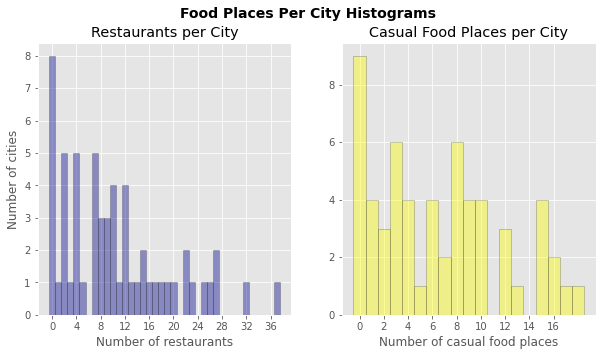

In [26]:
# Histogram of restaurants per city
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Food Places Per City Histograms',fontsize=14, fontweight='bold')

bins0 = np.arange(0, bay_grouped['Restaurant'].max() + 1.5) - 0.5
sns.distplot(bay_grouped['Restaurant'], ax=axes[0],hist=True, kde=False, 
             bins=bins0, color = 'darkblue', 
             hist_kws={'edgecolor':'black'})

axes[0].set_title('Restaurants per City')
axes[0].set_xlabel('Number of restaurants')
axes[0].set_ylabel('Number of cities')
axes[0].set_xticks(np.arange(0, 40, step=4)) 

bins1 = np.arange(0, bay_grouped['Casual Food'].max() + 1.5) - 0.5
sns.distplot(bay_grouped['Casual Food'], ax=axes[1], hist=True, kde=False, 
             bins=bins1, color = 'yellow', 
             hist_kws={'edgecolor':'black'})

axes[1].set_title('Casual Food Places per City')
axes[1].set_xlabel('Number of casual food places')
axes[1].set_xticks(np.arange(0, 18, step=2)) 

The distribution is quite random, hence we will show the median and interquantile percentages as well in a boxplot in order to help us to make our decission of which should be the minimum number of food places required for our selected candidate cities.

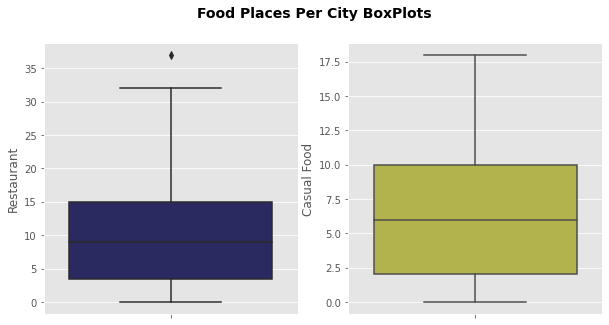

In [27]:
#Box plots
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Food Places Per City BoxPlots',fontsize=14, fontweight='bold')

sns.boxplot(y=bay_grouped['Restaurant'],ax=axes[0], color = 'darkblue',saturation=0.4)
sns.boxplot(y=bay_grouped['Casual Food'],ax=axes[1], color = 'yellow', saturation=0.4)

If we analyze those boxplots, we can observe that the median for each category is:

* 9 for restaurants
* 7 for casual food places

We have decided to use those median values as the minimum requirements that will be introduced in our filter for the candidate cities.
The reasoning behind this decission is that:

* 9 different restaurants is enough for our employees doesn't need to repeat restaurants at least in couple of weeks, even if they decide to go have lunch everyday or they decide

* 7 different casual food places is enough as well for our employees if they decide to have a quick lunch or dinner and have enough different choices

* those filters are not very restrictive, so we still expect that 50% of our cities will pass the food places cut

## Analyzing Sport Venues

We are going to do an analogous analysis for the number of sport venues.

In this case, we are going to plot directly the histogram and boxplot together in order to help us to find the filter to apply.

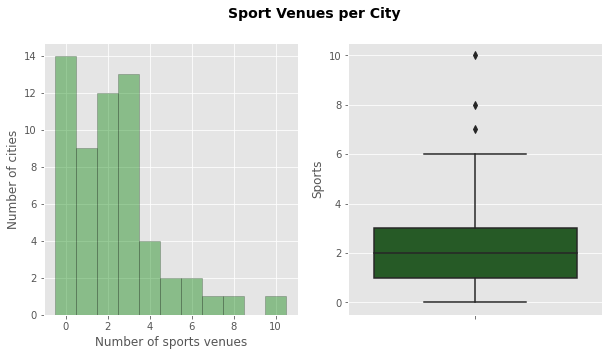

In [28]:
# Sports venues
# Histogram of restaurants per city
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Sport Venues per City',fontsize=14, fontweight='bold')

bins = np.arange(0, bay_grouped['Sports'].max() + 1.5) - 0.5
sns.distplot(bay_grouped['Sports'], ax=axes[0],hist=True, kde=False, 
             bins=bins, color = 'green', 
             hist_kws={'edgecolor':'black'})

axes[0].set_xlabel('Number of sports venues')
axes[0].set_ylabel('Number of cities')

sns.boxplot(y=bay_grouped['Sports'],ax=axes[1], color = 'green',saturation=0.4)

As we can observe, the median of sport venues for our list of cities is 2.

However, we think that is a very low number for our requirements, so we are going to set the filter of minimum number of sport venues to 3.

The reasoning behind this decission is that taking into account that the 75% percentile is 3, we still expect that more than 25% of our pre-selected locations will pass this filter.


## Analyzing Public Transport Stations

In our next statistical analysis, we are going to take a look to the number of public transport stations located in the center of each of our pre-selected cities.

In order to help us with out analysis, we are going to plot the histogram and a boxplot as we already did with other previous categories in our analysis.

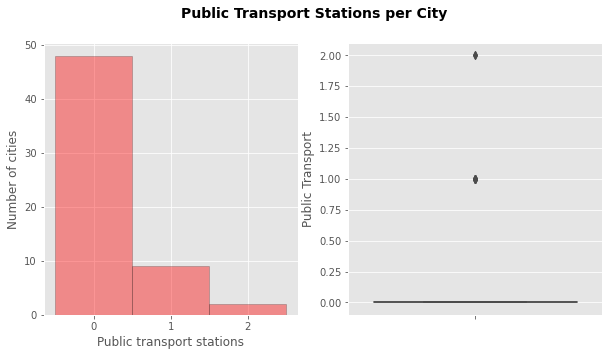

In [29]:
# Public transport
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Public Transport Stations per City',fontsize=14, fontweight='bold')

bins = np.arange(0, bay_grouped['Public Transport'].max() + 1.5) - 0.5
sns.distplot(bay_grouped['Public Transport'], ax=axes[0],hist=True, kde=False, 
             bins=bins, color = 'red', 
             hist_kws={'edgecolor':'black'})

axes[0].set_xlabel('Public transport stations')
axes[0].set_ylabel('Number of cities')
axes[0].set_xticks(np.arange(0, 3, step=1)) 

sns.boxplot(y=bay_grouped['Public Transport'],ax=axes[1], color = 'red',saturation=0.4)

As we can observe, as per the data retrieved from FourSquare, most of the cities didn't have any public transport station in the city center.

We know that there are several bus and metro lines across the San Francisco Bay, so it seems to be that public stations are not well reflected in the FourSquare database.

Hence, as we cannot really trust the FS data for this category, we are not going to include any specific filter, for selecting our candidates cities, related to public transport.

## Analyzing Afterwork Drinks Venues

In previous sections, we defined as a not mandatory but nice to have requirement, the existence of venues where our employees can go afterwork for a drink and socialize with other colleages.

So, we are going to do the same statistical analysis that we did with previous categories and select an appropiate mininum number of drinks places for our filter of candidate cities.

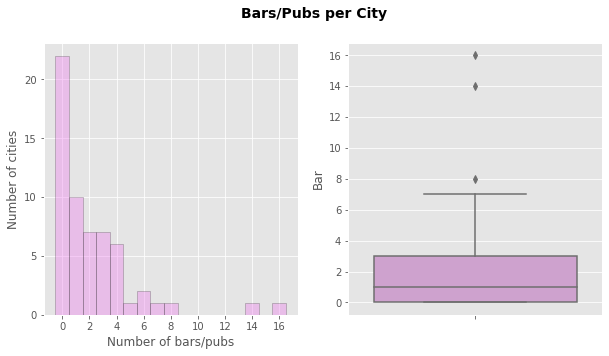

In [30]:
#Bars
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Bars/Pubs per City',fontsize=14, fontweight='bold')

bins = np.arange(0, bay_grouped['Bar'].max() + 1.5) - 0.5
sns.distplot(bay_grouped['Bar'], ax=axes[0],hist=True, kde=False, 
             bins=bins, color = 'violet', 
             hist_kws={'edgecolor':'black'})

axes[0].set_xlabel('Number of bars/pubs')
axes[0].set_ylabel('Number of cities')
axes[0].set_xticks(np.arange(0, 18, step=2)) 

sns.boxplot(y=bay_grouped['Bar'],ax=axes[1], color = 'violet',saturation=0.4)

As we can observe in the histogram and in the boxplot, the median for number of bars/pubs in the pre-selected cities is 1 but there are still quite a lot of cities with 2 or more bars/pubs.

Hence, we have decided that we will discard cities that doesn't have 2 or more drinks venues allocated in there.

## Candidate Cities and Heatmap

In the previous steps we have defined the filters that we will apply in order to select our final candidate cities.

As a recap, those filters are:

* at least 9 restaurants allocated in the city center

* at least 7 casual food places allocated in the city center

* at least 3 sports venues allocated in the city center

* at least 2 afterwork drinks spots (bars/pubs) allocated in the city center

So, if we apply those filters into the pre-selection of 60 cities that matched our population requirement, we will get the following selection of cities:

In [31]:
#Use the requirements to filter the cities and do a first selection
#Requirements are at least: 9 restaurants, 7 casual food places, 3 sport venues, 2 bars
bay_filtered = bay_grouped[(bay_grouped['Restaurant']>=9)&(bay_grouped['Casual Food']>=7)&(bay_grouped['Sports']>=3)&(bay_grouped['Bar']>=2)]
print(bay_filtered.shape)
bay_filtered

(10, 16)


,City,Bar,Beauty,Casual Food,Entertainment,Groceries,Health Services,Hotel,Laundry,Legal and Financial,Other,Public Transport,Restaurant,Soft Drinks,Sports,Store
7,Campbell,3,0,13,3,1,0,0,0,1,0,0,9,2,3,9
11,Danville,6,0,17,1,4,0,0,0,1,1,0,19,6,3,2
18,Hayward,3,0,7,0,1,0,1,0,1,2,0,15,1,4,2
20,Livermore,16,2,15,2,2,0,0,0,1,0,1,22,8,4,8
24,Menlo Park,3,0,8,1,4,3,1,0,0,1,0,9,6,4,4
29,Napa,14,1,15,5,0,0,5,0,1,3,0,32,5,5,7
34,Palo Alto,4,0,16,4,2,0,3,0,0,0,2,22,11,6,8
37,Pleasant Hill,2,2,12,1,2,2,0,0,1,1,0,16,6,3,19
43,San Carlos,5,0,15,0,2,1,0,0,1,1,1,26,5,3,3
57,Walnut Creek,7,3,18,3,2,0,0,0,3,1,0,37,10,8,7


As we can observe, there are still 11 candidate cities matching our minimum requirements.

The goal of this exercise was to reduce the number of cities that we will need to visit in order to decide what would be the best place for locating our office and we consider that 11 cities is still a big number of cities to visit and we want to save our time.

So, as a final step, we are going to select the best cities between those 11 candidates.

In order to do that, we have decided that we are going to plot a heatmap showing the number of venues for each combination of one of the most interesting categories and candidate city.
The heatmap will help us to compare the number of venues between cities and will be very useful to decide the finalist cities.

In [32]:
#We are going to plot a heat map and decide the finalists between the 9 filtered cities
#For that, we are going to take into account as well: Entertainment, Soft Drinks places and Stores

#1st - Remove non-interesting categories from our dataframe
bay_filter_places = bay_filtered[['City','Bar','Casual Food','Entertainment','Public Transport','Restaurant','Soft Drinks','Sports','Store']]

#Use the city as index
bay_heat = bay_filter_places.set_index('City')

Text(0.5, 15.0, 'Venue category')

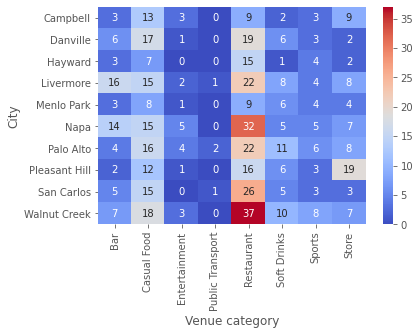

In [33]:
#Plot the heatmap
sns.heatmap(bay_heat,annot = True, fmt="d", linewidths=0, cmap = 'coolwarm', xticklabels = True)
plt.ylabel('City')
plt.xlabel('Venue category')

This absolute heatmap is quite interesting to observe the absolute number of venues for each city but in order to compare different categories is not the best option.

For example, as the number of restaurantes for each city is always much higher than sports venues, sports venues are printed in quite similar shades of blue, hence difficult to compare cities just taking a look to the heatmap.

So, we are going to normalize each category dividing the number of venues per category/city by the maximum number of venues in each category. 
That way we will have always a value between 0 and 1 and will be very useful for comparing our different candidate cities.

Text(33.0, 0.5, 'City')

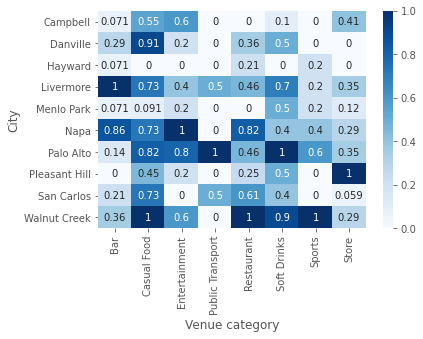

In [34]:
#Need to normalize the heatmap dataframe for better visualization purposes
#Will divide each column by max value so we get a value between 0 and 1
normalized_bay_heat=(bay_heat-bay_heat.min())/(bay_heat.max()-bay_heat.min())

sns.heatmap(normalized_bay_heat,annot = True, linewidths=0, cmap = 'Blues', xticklabels = True)
plt.xlabel('Venue category')
plt.ylabel('City')

In the next section, we will analyze this heatmap and will finally get to the conclusion of which will be our final selection of cities to visit.

# Results

Finally, we are going to decide which cities of these 11 finalists that fulfilled our previous requirements are the best options for locating our office.
If we study the pros and cons of each one of those:

* Campell - Discarded
    + Big number of casual food and entertainment venues
    + However, is one of the finalists with less restaurants, sport venues, bars, etc...
 
 
* Danville - Discarded
    + It's one of the cities with more casual food and soft drinks places
    + However, is one of the finalists with less restaurants, sport venues, etc...


* Hayward - Discarded
    + It's the city with less interesting venues within the finalists


* Livermore - Discarded
    + The one with more bars and a big number of casual food places. There is also a public transport station
    + However, the numbers of restaurants is low compare with the rest of finalists and the number of other venues like stores or entertainment venues is quite low as well


* Menlo park - Discarded
    + It's the second city with less interesting venues within the finalists


* Napa - Selected
    + High number of bar, casual food, restaurants and entertainment venues. In the average for sports and soft drinks


* Palo Alto - Selected
    + High number of casual food, entertainment, soft drinks and sport venues. Additionally, there is at least one public transport station
    + Low number of bars and restaurants compared to other candidate cities


* Pleasant Hill - Discarded
    + High number of casual food, soft drinks and stores (it seems to be that there is a shopping mall close to the city center)
    + However, it has a very low number of bars, restaurants and sports venues compared to other cities


* Redwood City - Selected
    + High number of casual food, restaurants, bars, soft drinks and entertainment places compared to the rest of candidates
    + Only 3 sports venues


* San Carlos - Discarded
    + High number of casual food and restaurants
    + However, for the rest of categories, the number is quite low compared to the other candidates


* Walnut Creek - Selected
    + The one with highest number of casual food, restaurants and sports venues
    + Acceptable number of bars and entertainment places

So, our finalist cities will be 4: **Napa, Palo Alto, Redwood City and Walnut Creek**. 
We will show them in the San Francisco Bay map.

In [35]:
SFBay_map = folium.Map(location=[bay_latitude, bay_longitude], zoom_start=9)

#Add markers for each location
for lat, lng, name, county in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Name'],coordinates_df['County']):
    label = '{}, {}'.format(name, county)
    label = folium.Popup(label, parse_html=True)
    
    #Print final markers in red
    if (name in ['Napa','Palo Alto','Redwood City','Walnut Creek']):
        color='red'
        fill_color='#d97652'
        rad=8
    else:
        color='blue'
        fill_color='#3186cc'
        rad=5
    
    folium.CircleMarker(
        [lat, lng],
        radius=rad,
        popup=label,
        color=color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.7,
        parse_html=False).add_to(SFBay_map)  

SFBay_map

In fact, if we observe the map, Napa is quite far away from the rest of the cities in the Bay, so we can discard that as well if we are looking for a good comunicated city.

As a result of this statistical analysis and the different requisites we have used for filtering the candidate cities, we finally only need to visit 3 cities (Palo Alto, Redwood City and Walnut Creek) in order to decide which is the best location for our new offices.

This will save us a huge amount of time, compared to having to visit the 101 municipalities that are part of San Francisco Bay area.

# Discussion

There are some points that we could improve in our analysis in future iterations:

* The number of public transport stations retrieved from FourSquare doesn't seem to be completely accurate as for most of the cities FourSquare has not returned any.

    + In order to improve this, for example, we could do some webscrapping in the Bay Area Rapid Transit website (https://www.bart.gov/stations) and major bus agencies, ferries, etc...


* The office rental prices for each location was not important in our requirements as we prefer that our employees like the office location instead of saving some money with a cheaper rent. However, it could be interesting adding that information in order to help us to take our final decission.
    
    + We could look for a rental price report for the SF Bay in the internet and use webscrapping to get the data

    + We could add the average rental price per square meter as a new column in our venues dataframe and use that information in our final heatmap in order to help us to take a decission
    
    + For example, in case of having 2 cities with a similar number of venues, that are both good candidates, we can select the one with lowest rental prices
    
    
* Executing our automated scripts several times, most of the time we get 11 candidate cities that are passing our filters, but there are few times where there are only 9 or 10.

    + We have noticed that the FourSquare API is not always returning the same number of venues. It's always around 2000 venues, but there are differences of 20 venues above or below that number
    
    + As a consecuence, there are a couple of cities (Campbell and Menlo Park) that can barely meet the requirements, that sometimes are not included in the cut
    
    + In order to fix this, when we retrieve all the venues, it could be interesting to save that dataframe into a CSV
    
 

# Conclusion

The goal of this analysis was to reduce the number of candidate cities for our new office locations from 101 possible candidates (mucipalities inside the San Francisco Bay Area) into only 3 final candidates. 

That will save us a lot of time and allow us to start our business as soon as possible.

In order to achieve our goal, our first step was to define our requirements:

* medium population city, between 20000 and 120000 citizens

* our office must be located within 500 meters of the city center

* to filter based on minimum number of venues of each desired type: restaurants, sports venues, bars, public transport stations

* other number of venues for other interesting categories: entertainment places, stores and shops, etc...

The next step consisted on adquiring our data required and we did that from 3 sources:

* obtained list of municipalities and population from Wikipedia using webscrapping

* obtained coordinadtes of the city center for each one through the Nominatim API for Python

* obtained the list of venues within each city center though requests to the FourSquare web API

Once the necessary data was retrieved, it was necessary to do some transformations: grouping the 200+ different venue categories into aggregated venue categories and count the number of venues of each type for each location.

After our transformation was ready, did our statistical analysis of the number of venues per each combination of cities and venue categories in order to get our final filters:

* 
